In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt



In [8]:
! unzip /content/PlantVillage.zip #Unzipping the Files


Streaming output truncated to the last 5000 lines.
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08c033bd-fbc3-445a-88d1-1863070e52ce___YLCV_GCREC 2872.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08dd176c-e9d9-4746-92c3-fa8dc9074347___UF.GRC_YLCV_Lab 03057.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/08f78a80-46f5-45a6-937c-4d05d61c08c2___UF.GRC_YLCV_Lab 01895.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0903aa95-6e8a-4abd-a003-126fcd9a5493___YLCV_GCREC 2806.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0911d416-d73d-4c2a-8e45-207a7ceb7c9a___YLCV_GCREC 2773.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/09188838-cc89-4925-94c5-d9563c4cb4bf___UF.GRC_YLCV_Lab 02974.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/0922e026-b563-438d-b9ed-7476153023ce___YLCV_GCREC 2258.JPG  
  inflating: PlantVillage/Tomato__Tomato_YellowLeaf__Cur

In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/PlantVillage',
    shuffle=True,
    image_size = (256, 256),
    batch_size = 32
)


Found 20638 files belonging to 15 classes.


In [10]:

class_names = dataset.class_names

class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [11]:
print("No.of Batches:",len(dataset))   # 20638/32 = 645

No.of Batches: 645


In [12]:

for image_batch, labels_batch in dataset.take(1): # Retrieves the first batch from the dataset
  print(image_batch.shape)  # Contains the images in the batch
  print(labels_batch.numpy()) # Contains the labels corresponding to those images

# 32: The number of images in this batch.
# 256x256: The dimensions of each image (height and width).
# 3: The number of color channels (RGB) in each image.


(32, 256, 256, 3)
[11  1  3  0 11  8  7  2 12 11  5  3  6  0  5  9  2 14 12 10  8  6  1 11
  5  1 12 14  7  7 14 14]


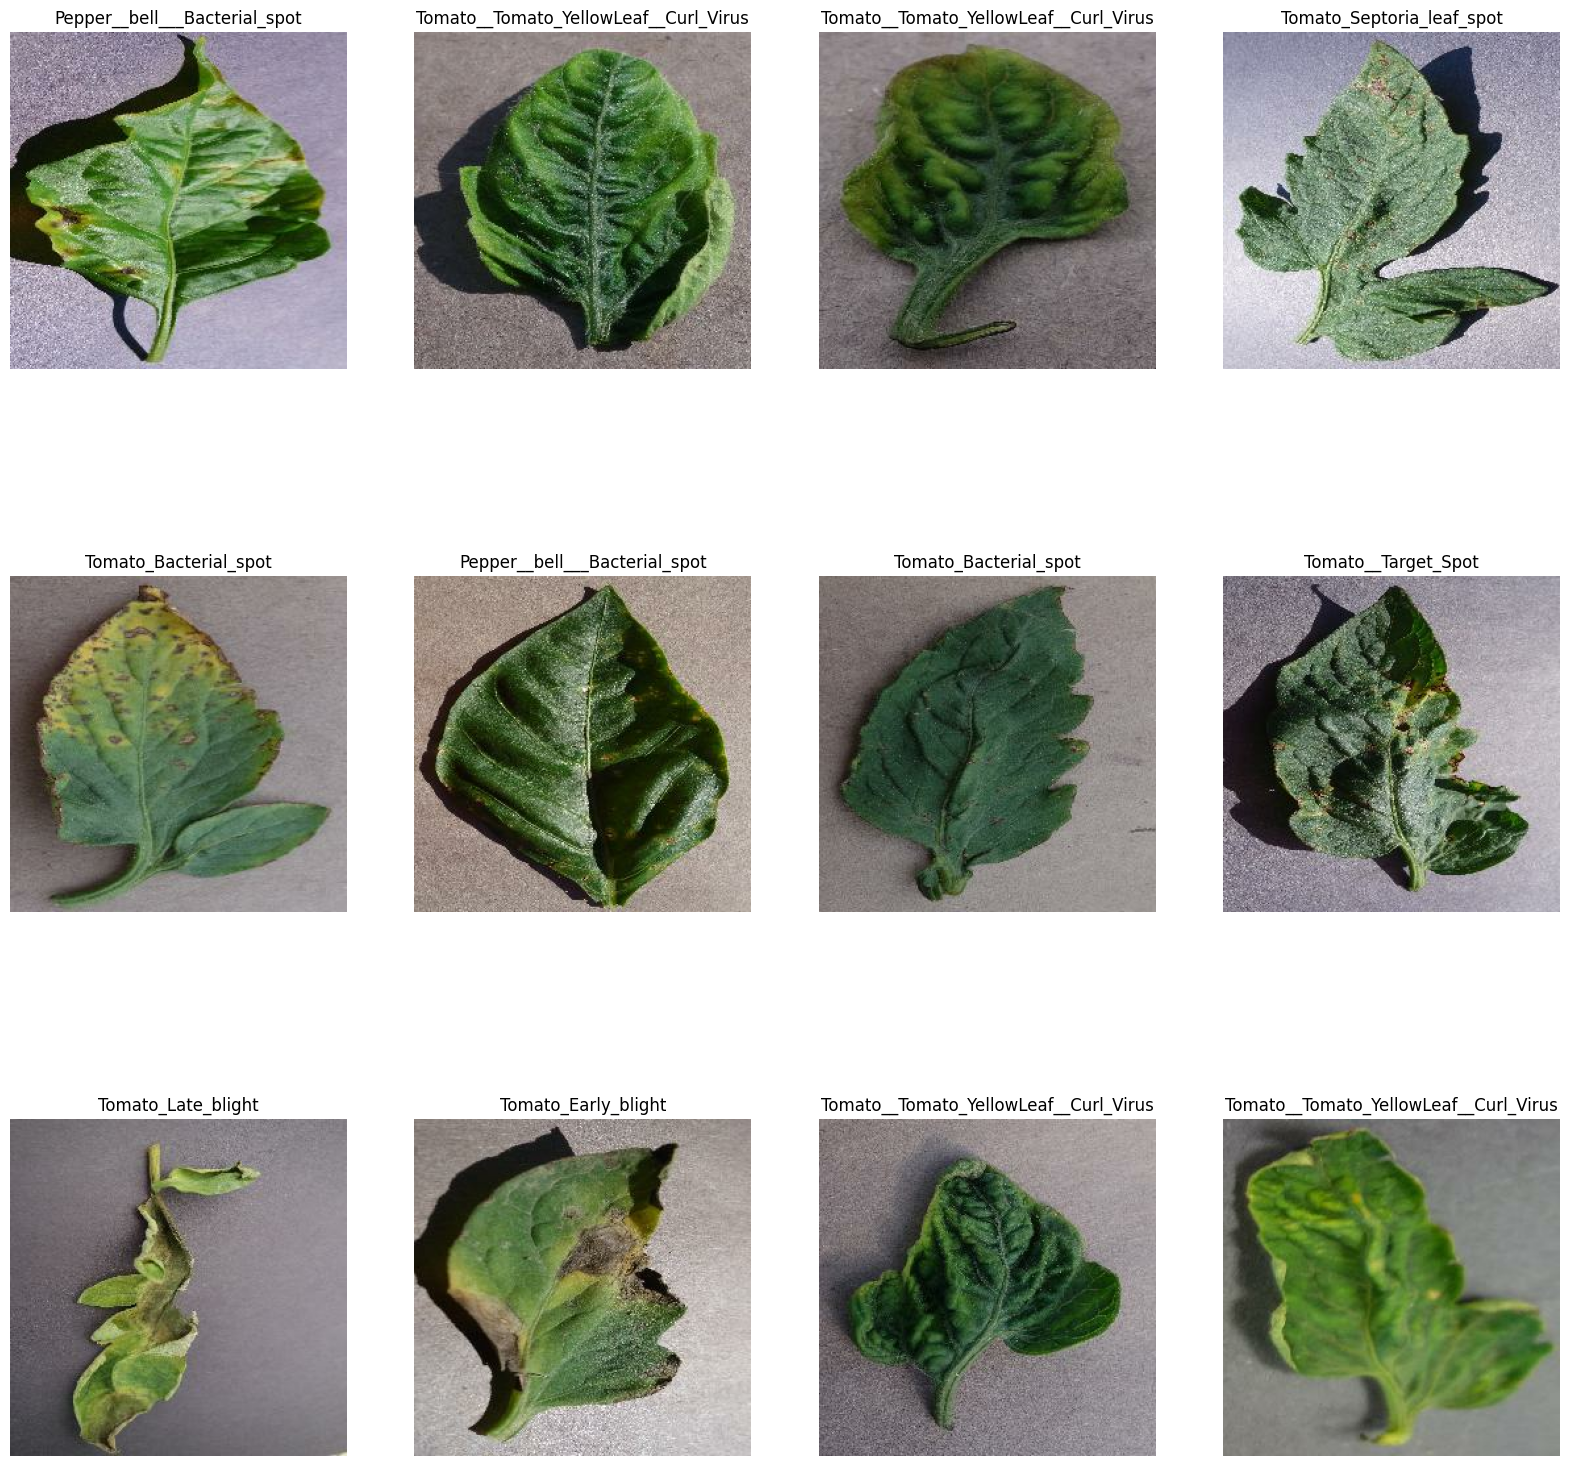

In [13]:
# Printing Images
plt.figure(figsize=(20,20))
for image_batch, labels_batch in dataset.take(1):
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8")) # Ensures the pixel values are in the 0-255 range and formatted as 8-bit unsigned integers, which is a standard format for image data.
    plt.title(class_names[labels_batch[i]])
    plt.axis('off')

In [ ]:
# Train_test_split

80% for training
20% for testing, 10% for validation



# Total Dataset Splitting:
# Training Set: 80% of the entire dataset
# Validation Set: 10% of the entire Batch, our's is 640
# Test Set: 10% of the entire Batch, our's is 640

SyntaxError: invalid syntax (<ipython-input-8-7bba937bb6e6>, line 3)

In [14]:
# Calculate the number of batches

batch_size = 32
dataset_size = 20640  # Total number of images
total_batches = dataset_size // batch_size
total_batches




645

In [15]:
# Calculate sizes for training, validation, and test sets in batches


train_batches = int(0.8 * total_batches) # 80% for training

val_batches = int(0.1 * total_batches) # 10% for validation

test_batches = total_batches - train_batches - val_batches  # Remaining for test

In [16]:

# Create training, validation, and test datasets

train_dataset = dataset.take(train_batches) # Take the first 80% for training

remaining_dataset = dataset.skip(train_batches) # Skip the first 80%, get the remaining 20%




# Splitting the remaining dataset into validation and test datasets

val_dataset = remaining_dataset.take(val_batches) # Take the next 10% for validation

test_dataset = remaining_dataset.skip(val_batches) # Skip the next 10%, get the remaining 10% for testing



In [17]:
len(test_dataset)

65

In [18]:
# Apply other optimizations
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [19]:
# Define image preprocessing
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1.0 / 255)
])

In [20]:
# Data Augmentation

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [21]:



model = models.Sequential([
    # Data augmentation and resizing (if used)
    resize_and_rescale,
    data_augmentation,

    # Convolution and pooling layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size= (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(15, activation='softmax')  # Output layer with 15 neurons for classification
])

# Build the model with the correct input shape
model.build(input_shape=(32, 256, 256, 3))



In [22]:
# Print model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [23]:
# Final Model

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
# Training the Network

history = model.fit(
    train_dataset,
    epochs=10,
    batch_size=32,
    validation_data=val_dataset,
    verbose=1
)

Epoch 1/10
516/516 [==============================] - 295s 567ms/step - loss: 1.5799 - accuracy: 0.4844 - val_loss: 1.0061 - val_accuracy: 0.6523
Epoch 2/10
516/516 [==============================] - 284s 550ms/step - loss: 0.7829 - accuracy: 0.7357 - val_loss: 0.9018 - val_accuracy: 0.6855
Epoch 3/10
516/516 [==============================] - 284s 550ms/step - loss: 0.5435 - accuracy: 0.8158 - val_loss: 0.6157 - val_accuracy: 0.7876
Epoch 4/10
516/516 [==============================] - 284s 551ms/step - loss: 0.4311 - accuracy: 0.8524 - val_loss: 0.3973 - val_accuracy: 0.8628
Epoch 5/10
516/516 [==============================] - 285s 553ms/step - loss: 0.3515 - accuracy: 0.8798 - val_loss: 0.4751 - val_accuracy: 0.8438
Epoch 6/10
516/516 [==============================] - 287s 556ms/step - loss: 0.3089 - accuracy: 0.8932 - val_loss: 0.5750 - val_accuracy: 0.8257
Epoch 7/10
516/516 [==============================] - 287s 555ms/step - loss: 0.2764 - accuracy: 0.9059 - val_loss: 0.4028 -

In [25]:
scores = model.evaluate(test_dataset)

scores

65/65 [==============================] - 8s 101ms/step - loss: 0.2443 - accuracy: 0.9216


[0.2443331629037857, 0.92155921459198]

In [26]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 516}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc = history.history['accuracy']
valid_acc = history.history['val_accuracy']

loss = history.history['loss']
valid_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

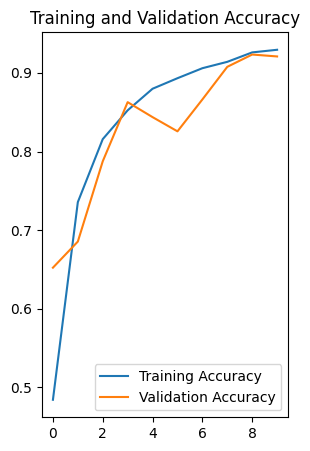

In [29]:
EPOCHS = 10


plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training Accuracy')
plt.plot(range(EPOCHS),valid_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


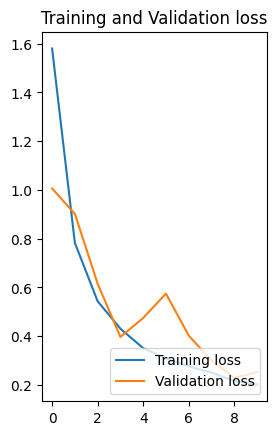

In [30]:
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Training loss')
plt.plot(range(EPOCHS),valid_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')
plt.show()

In [31]:
import pickle

# Save the model architecture and weights as a dictionary
model_dict = {
    "model_json": model.to_json(),
    "model_weights": model.get_weights()
}

# Save this dictionary as a pickle file
with open('ann_model.pkl', 'wb') as file:
    pickle.dump(model_dict, file)

print("ANN model saved as ann_model.pkl")


ANN model saved as ann_model.pkl


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found
